# Libraries and Dataset Setup
    We load essential libraries such as NumPy, Pandas, and Matplotlib for processing and visualization. The dataset is read from the specified directory.

## Key Steps:
- Load and shuffle the data.
- Split the data into training and development sets.
- Normalize the feature values to the range [0, 1].

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [27]:
from matplotlib import pyplot as plt

In [28]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [29]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [30]:
Y_train

array([6, 9, 9, ..., 9, 6, 4])

# Neural Network Initialization
The neural network is initialized with random weights and biases. It consists of:

- Input Layer: 784 neurons (28x28 pixels).
- Hidden Layer: 10 neurons with ReLU activation.
- Output Layer: 10 neurons with softmax activation.

In [31]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Forward Propagation
This function calculates the activations for each layer:

- ReLU Activation: For the hidden layer.
- Softmax Activation: For the output layer.


In [32]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Backward Propagation and Parameter Updates
Gradient descent is used to optimize weights and biases, with derivatives calculated for both layers.

## Key Functions:
- ReLU Derivative: To compute gradients for the hidden layer.
- Softmax Derivative: To adjust the output layer.



In [33]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [34]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

# Training the Model
The gradient_descent function trains the model for a specified number of iterations and learning rate.

- Iterations: 500
- Learning Rate (alpha): 0.10 \
The accuracy is printed every 10 iterations for evaluation.

In [35]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 9 0 ... 0 0 0] [6 9 9 ... 9 6 4]
0.0905609756097561
Iteration:  10
[5 9 0 ... 3 6 9] [6 9 9 ... 9 6 4]
0.21217073170731707
Iteration:  20
[5 9 0 ... 3 6 9] [6 9 9 ... 9 6 4]
0.30621951219512195
Iteration:  30
[5 9 0 ... 3 6 9] [6 9 9 ... 9 6 4]
0.3729268292682927
Iteration:  40
[5 9 0 ... 6 6 9] [6 9 9 ... 9 6 4]
0.44065853658536586
Iteration:  50
[5 9 0 ... 9 6 9] [6 9 9 ... 9 6 4]
0.4970731707317073
Iteration:  60
[2 9 0 ... 9 6 9] [6 9 9 ... 9 6 4]
0.5417804878048781
Iteration:  70
[2 9 0 ... 9 6 9] [6 9 9 ... 9 6 4]
0.5790731707317073
Iteration:  80
[2 9 0 ... 9 6 9] [6 9 9 ... 9 6 4]
0.6110487804878049
Iteration:  90
[2 9 7 ... 9 6 9] [6 9 9 ... 9 6 4]
0.6384146341463415
Iteration:  100
[2 4 7 ... 9 6 9] [6 9 9 ... 9 6 4]
0.6607073170731708
Iteration:  110
[2 4 7 ... 9 6 9] [6 9 9 ... 9 6 4]
0.6794634146341464
Iteration:  120
[2 4 7 ... 9 6 9] [6 9 9 ... 9 6 4]
0.6947560975609756
Iteration:  130
[2 4 6 ... 9 6 9] [6 9 9 ... 9 6 4]
0.7063658536585365
Iteration:  14

# Predictions and Testing
The trained model is used to predict digit labels for new data. Predictions are displayed alongside the corresponding image.

## Visualization:
Each test prediction is displayed as an image along with the model's prediction and the actual label.

In [36]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  6


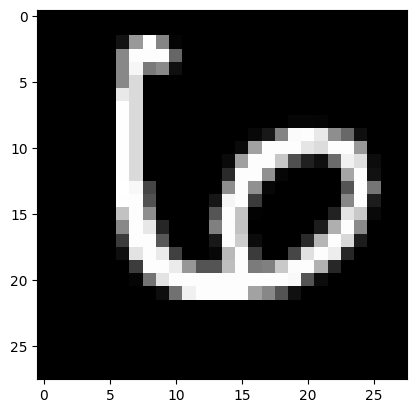

Prediction:  [4]
Label:  9


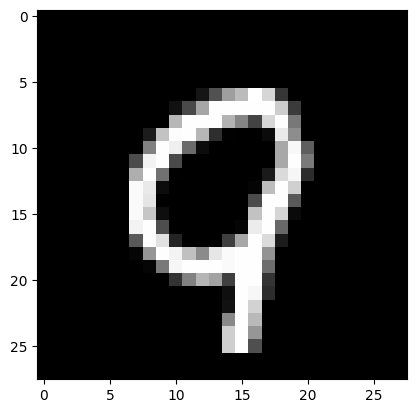

Prediction:  [7]
Label:  9


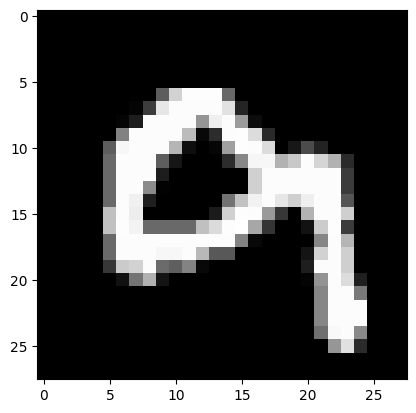

Prediction:  [7]
Label:  7


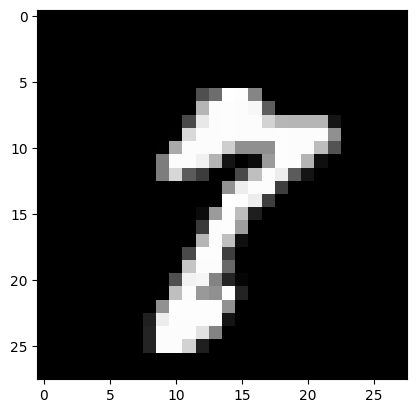

In [37]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

# Development Set Evaluation
The model's accuracy is evaluated on the development set, providing a final measure of performance.

In [38]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 0 2 2 7 3 4 0 3 6 3 0 6 7 1 6 3 9 1 7 5 2 1 6 3 9 1 0 1 4 3 9 8 4 0 7 8
 7 1 2 0 8 3 8 3 8 5 5 4 2 4 0 1 1 5 1 5 9 4 1 8 8 1 8 8 0 1 5 1 4 3 2 1 2
 3 1 8 5 5 8 9 4 6 9 4 1 2 7 8 8 3 5 0 1 5 8 5 3 1 9 8 9 8 7 8 9 3 3 1 3 9
 7 6 6 8 9 8 3 2 2 1 0 3 1 0 9 1 3 8 6 9 0 5 0 6 8 6 1 1 8 6 3 9 7 3 1 3 4
 6 2 2 3 2 4 7 9 8 9 6 5 9 7 8 5 0 4 6 7 0 6 4 1 5 9 9 1 6 7 2 9 0 5 8 1 9
 2 9 4 2 1 4 4 6 1 6 2 6 2 9 6 7 2 5 5 6 3 1 0 3 2 2 1 6 1 6 3 0 2 3 8 0 8
 0 0 1 5 7 5 1 5 2 2 3 9 2 8 0 8 9 8 0 7 4 4 2 5 6 0 8 5 1 2 2 3 6 9 7 6 9
 3 9 3 0 4 1 5 3 8 8 2 3 1 6 6 6 4 7 3 9 4 9 3 9 5 7 9 7 2 8 1 7 4 5 3 0 4
 0 9 1 7 9 1 4 1 0 4 4 8 8 8 6 5 1 2 5 9 3 5 2 8 6 0 1 1 2 6 3 0 0 3 2 0 9
 6 0 5 5 2 8 7 4 3 5 2 2 3 3 3 8 1 1 0 2 4 2 3 2 8 6 7 4 6 4 9 4 0 9 7 8 1
 4 5 8 5 4 4 5 7 8 2 8 3 4 0 9 7 1 9 7 2 4 8 9 5 9 5 8 2 7 6 8 7 2 6 5 8 9
 4 9 0 4 5 0 8 3 9 5 5 6 9 5 3 6 4 0 2 4 1 1 2 0 3 3 5 5 2 4 2 0 3 0 0 8 4
 3 1 5 6 7 3 1 1 7 7 2 5 9 1 5 2 6 8 4 3 0 4 1 1 3 8 6 5 0 8 2 2 6 1 7 4 7
 1 6 1 5 8 8 2 6 0 7 9 3 

0.839

# Conclusion
This notebook implements a simple neural network for digit recognition using the MNIST dataset. It demonstrates key concepts in machine learning, including:

- Preprocessing data.
- Implementing forward and backward propagation.
- Training a model using gradient descent.
- Evaluating performance. \
Future improvements could include adding more hidden layers, experimenting with different activation functions, or implementing regularization to improve accuracy further.